[View in Colaboratory](https://colab.research.google.com/github/attrigirish/python-ml/blob/master/Isha_Aggarwal_Corelation_Project.ipynb)

**Import Libraries**

In [0]:
import pandas as pd
import numpy as np
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

**Import Data : Mortality**

In [2]:
mortality_data=pd.read_csv("https://python-ml.000webhostapp.com/data/mortality_data.csv")
print(mortality_data.head())

   YEAR                                              CAUSE GENDER AGEGROUP  \
0  2012  Acute bronchitis and acute bronchiolitis (J20-...      F        A   
1  2012  Acute bronchitis and acute bronchiolitis (J20-...      F        B   
2  2012  Acute bronchitis and acute bronchiolitis (J20-...      F        C   
3  2012  Acute bronchitis and acute bronchiolitis (J20-...      M        A   
4  2012  Acute bronchitis and acute bronchiolitis (J20-...      M        B   

   MORTALITY  
0          8  
1          3  
2          0  
3          8  
4          1  


**Import Data : Population**

In [17]:
pollution_data=pd.read_csv("https://python-ml.000webhostapp.com/data/pollution_data.csv")
print(pollution_data.head())

   YEAR   SO2   NO2   RSPM    SPM  PM25
0  2003   NaN  34.0  149.0  205.0   NaN
1  2003  11.0  39.0  184.0  405.0   NaN
2  2003  12.0  42.0  190.0  429.0   NaN
3  2003  14.0  41.0  187.0  304.0   NaN
4  2003  13.0  39.0  192.0  323.0   NaN


**Data Summary**

In [18]:
print("\nPollution Data Info:\n")
print(pollution_data.info())

print("\nPollution Data Description:\n")
print(pollution_data.describe())

print("\nPollution Data Null Values Summary:\n")
print(pollution_data.isnull().sum())


Pollution Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 6 columns):
YEAR    2039 non-null int64
SO2     1962 non-null float64
NO2     2012 non-null float64
RSPM    1992 non-null float64
SPM     567 non-null float64
PM25    371 non-null float64
dtypes: float64(5), int64(1)
memory usage: 95.7 KB
None

Pollution Data Description:

              YEAR          SO2          NO2         RSPM          SPM  \
count  2039.000000  1962.000000  2012.000000  1992.000000   567.000000   
mean   2011.883767     6.530224    61.202087   210.101908   443.559083   
std       4.335617     5.240183    32.167913   111.872013   201.799168   
min    2003.000000     2.000000     6.300000    18.000000    73.000000   
25%    2009.000000     4.000000    40.175000   131.000000   283.000000   
50%    2014.000000     4.000000    51.000000   191.000000   407.000000   
75%    2015.000000     8.000000    70.000000   267.000000   592.000000   
max    2015.00000

**Fetching Column Names**

In [19]:
columns=pollution_data.columns
print(columns)

Index(['YEAR', 'SO2', 'NO2', 'RSPM', 'SPM', 'PM25'], dtype='object')


**Handling Null Values**

In [20]:
imp = Imputer(missing_values=np.nan, strategy='mean')
imp.fit(pollution_data)
pollution_data=pd.DataFrame(imp.transform(pollution_data))
pollution_data.columns=columns
pollution_data['YEAR']=pollution_data['YEAR'].astype('int')
print(pollution_data.head())

   YEAR        SO2   NO2   RSPM    SPM       PM25
0  2003   6.530224  34.0  149.0  205.0  95.113208
1  2003  11.000000  39.0  184.0  405.0  95.113208
2  2003  12.000000  42.0  190.0  429.0  95.113208
3  2003  14.000000  41.0  187.0  304.0  95.113208
4  2003  13.000000  39.0  192.0  323.0  95.113208


**Adding Missing Years**

In [21]:
pollution_data=pollution_data.groupby(['YEAR'])[["SO2","NO2","RSPM","SPM","PM25"]].mean()
missing_year=[2007,2010,2011,2012,2013]

for year in missing_year:
    pollution_data.loc[year]=[np.nan,np.nan,np.nan,np.nan,np.nan]

pollution_data.reset_index(level=0,inplace=True)
print(pollution_data)

    YEAR        SO2        NO2        RSPM         SPM       PM25
0   2003   8.654079  39.229758  142.672163  348.871783  95.113208
1   2005   9.194104  62.985149  163.376238  507.485149  95.113208
2   2006  12.672766  43.731606  210.004023  522.659450  95.113208
3   2008   6.908423  69.390164  264.606557  467.901639  95.113208
4   2009   9.514855  54.650916  263.986273  515.913793  95.113208
5   2014   5.175887  64.164539  216.716773  443.559083  95.113208
6   2015   5.654426  67.257292  218.705808  443.559083  95.113208
7   2007        NaN        NaN         NaN         NaN        NaN
8   2010        NaN        NaN         NaN         NaN        NaN
9   2011        NaN        NaN         NaN         NaN        NaN
10  2012        NaN        NaN         NaN         NaN        NaN
11  2013        NaN        NaN         NaN         NaN        NaN


**Filling Null Values**

In [23]:
imp = Imputer(missing_values=np.nan, strategy='mean')
imp.fit(pollution_data)
pollution_data=pd.DataFrame(imp.transform(pollution_data))
pollution_data.columns=columns
pollution_data['YEAR']=pollution_data['YEAR'].astype('int')
pollution_data=pollution_data.sort_values('YEAR',ascending=True)
print(pollution_data)

    YEAR        SO2        NO2        RSPM         SPM       PM25
0   2003   8.654079  39.229758  142.672163  348.871783  95.113208
1   2005   9.194104  62.985149  163.376238  507.485149  95.113208
2   2006  12.672766  43.731606  210.004023  522.659450  95.113208
7   2007   8.253506  57.344203  211.438262  464.278568  95.113208
3   2008   6.908423  69.390164  264.606557  467.901639  95.113208
4   2009   9.514855  54.650916  263.986273  515.913793  95.113208
8   2010   8.253506  57.344203  211.438262  464.278568  95.113208
9   2011   8.253506  57.344203  211.438262  464.278568  95.113208
10  2012   8.253506  57.344203  211.438262  464.278568  95.113208
11  2013   8.253506  57.344203  211.438262  464.278568  95.113208
5   2014   5.175887  64.164539  216.716773  443.559083  95.113208
6   2015   5.654426  67.257292  218.705808  443.559083  95.113208


**Merging Pollution and Mortality Data**

In [24]:
final_data=pd.merge(pollution_data,mortality_data,on="YEAR")


print(final_data.head())
print(final_data.columns)

   YEAR       SO2        NO2        RSPM         SPM       PM25  \
0  2012  8.253506  57.344203  211.438262  464.278568  95.113208   
1  2012  8.253506  57.344203  211.438262  464.278568  95.113208   
2  2012  8.253506  57.344203  211.438262  464.278568  95.113208   
3  2012  8.253506  57.344203  211.438262  464.278568  95.113208   
4  2012  8.253506  57.344203  211.438262  464.278568  95.113208   

                                               CAUSE GENDER AGEGROUP  \
0  Acute bronchitis and acute bronchiolitis (J20-...      F        A   
1  Acute bronchitis and acute bronchiolitis (J20-...      F        B   
2  Acute bronchitis and acute bronchiolitis (J20-...      F        C   
3  Acute bronchitis and acute bronchiolitis (J20-...      M        A   
4  Acute bronchitis and acute bronchiolitis (J20-...      M        B   

   MORTALITY  
0          8  
1          3  
2          0  
3          8  
4          1  
Index(['YEAR', 'SO2', 'NO2', 'RSPM', 'SPM', 'PM25', 'CAUSE', 'GENDER',
   

**Year and Disease wise Mortality Report**

In [25]:
aggregations={
        'SO2':'mean',
        'NO2':'mean',
        'RSPM':'mean',
        'SPM':'mean',
        'PM25':'mean',
        'MORTALITY':'sum'
    }

print(final_data.groupby(['YEAR','CAUSE']).agg(aggregations))

                                                              SO2        NO2  \
YEAR CAUSE                                                                     
2012 Acute bronchitis and acute bronchiolitis (J20-J21)  8.253506  57.344203   
     Asthma (J45-J46)                                    8.253506  57.344203   
     Bronchitis, chronic and unspecified, emphysema ...  8.253506  57.344203   
     Other lower respiratory disorders (J22, J44 & J47)  8.253506  57.344203   
     Pneumonia (J12-J18)                                 8.253506  57.344203   
2013 Acute bronchitis and acute bronchiolitis (J20-J21)  8.253506  57.344203   
     Asthma (J45-J46)                                    8.253506  57.344203   
     Bronchitis, chronic and unspecified, emphysema ...  8.253506  57.344203   
     Other lower respiratory disorders (J22, J44 & J47)  8.253506  57.344203   
     Pneumonia (J12-J18)                                 8.253506  57.344203   
2014 Acute bronchitis and acute bronchio

#Disease wise Mortality (Corelation Between Mortality and Pollutant Levels)



Mortality Report for :  Acute bronchitis and acute bronchiolitis (J20-J21)
                SO2       NO2      RSPM       SPM      PM25  MORTALITY
SO2        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.210819
NO2       -0.777778  1.000000  1.000000 -0.777778 -0.777778  -0.632456
RSPM      -0.777778  1.000000  1.000000 -0.777778 -0.777778  -0.632456
SPM        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.210819
PM25       1.000000 -0.777778 -0.777778  1.000000  1.000000   0.210819
MORTALITY  0.210819 -0.632456 -0.632456  0.210819  0.210819   1.000000


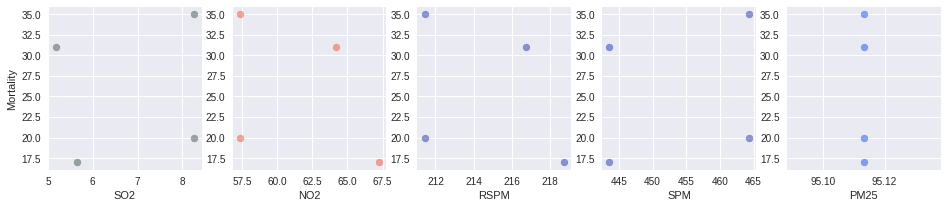

Mortality Report for :  Pneumonia (J12-J18)
                SO2       NO2      RSPM       SPM      PM25  MORTALITY
SO2        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.316228
NO2       -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.316228
RSPM      -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.316228
SPM        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.316228
PM25       1.000000 -0.777778 -0.777778  1.000000  1.000000   0.316228
MORTALITY  0.316228  0.316228  0.316228  0.316228  0.316228   1.000000


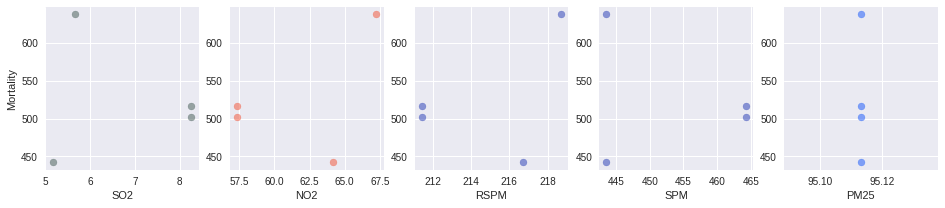

Mortality Report for :  Other lower respiratory disorders (J22, J44 & J47)
                SO2       NO2      RSPM       SPM      PM25  MORTALITY
SO2        1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.737865
NO2       -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.948683
RSPM      -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.948683
SPM        1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.737865
PM25       1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.737865
MORTALITY -0.737865  0.948683  0.948683 -0.737865 -0.737865   1.000000


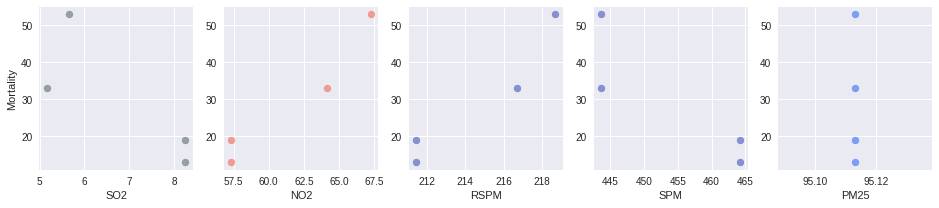

Mortality Report for :  Asthma (J45-J46)
                SO2       NO2      RSPM       SPM      PM25  MORTALITY
SO2        1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.055556
NO2       -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.388889
RSPM      -0.777778  1.000000  1.000000 -0.777778 -0.777778   0.388889
SPM        1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.055556
PM25       1.000000 -0.777778 -0.777778  1.000000  1.000000  -0.055556
MORTALITY -0.055556  0.388889  0.388889 -0.055556 -0.055556   1.000000


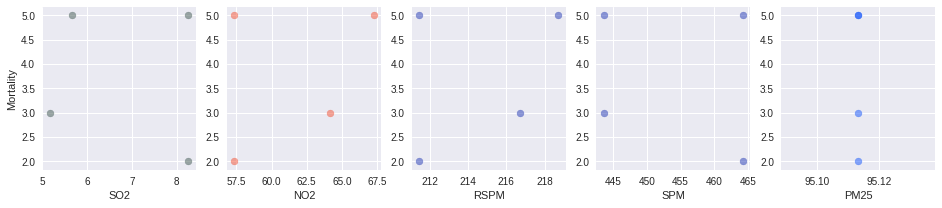

Mortality Report for :  Bronchitis, chronic and unspecified, emphysema (J40-J43)

                SO2       NO2      RSPM       SPM      PM25  MORTALITY
SO2        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.388889
NO2       -0.777778  1.000000  1.000000 -0.777778 -0.777778  -0.055556
RSPM      -0.777778  1.000000  1.000000 -0.777778 -0.777778  -0.055556
SPM        1.000000 -0.777778 -0.777778  1.000000  1.000000   0.388889
PM25       1.000000 -0.777778 -0.777778  1.000000  1.000000   0.388889
MORTALITY  0.388889 -0.055556 -0.055556  0.388889  0.388889   1.000000


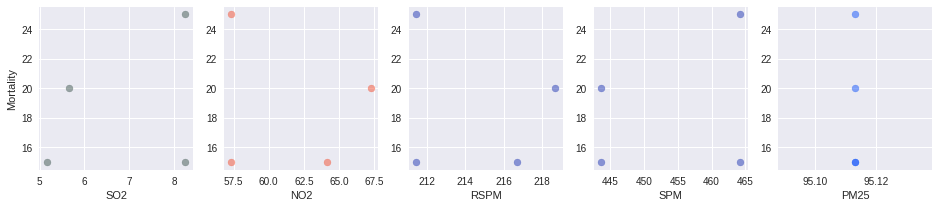

In [33]:
diseases=final_data['CAUSE'].unique()



for dis in diseases:
    print("Mortality Report for : ",dis)
    dis_wise_mortality_data=final_data[final_data['CAUSE']==dis].groupby(['YEAR','CAUSE']).agg(aggregations)
    #dis_wise_mortality_data.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
    print(dis_wise_mortality_data.corr(method='spearman'))
    
    plt.rcParams['figure.figsize'] = [16, 3]
    fig, ax = plt.subplots(nrows=1, ncols=5)

    ax=ax.flatten()

    cols = ['SO2','NO2','RSPM','SPM','PM25']
    colors=['#415952', '#f35134', '#243AB5', '#243AB5', '#1354FA']
    j=0

    for i in ax:
      if j==0:
        i.set_ylabel('Mortality')
      i.scatter(dis_wise_mortality_data[cols[j]], dis_wise_mortality_data['MORTALITY'],  alpha=0.5, color=colors[j])
      i.set_xlabel(cols[j])
      #i.set_title('Pearson: %s'%mpg_data.corr().loc[cols[j]]['mpg'].round(2)+' Spearman: %s'%mpg_data.corr(method='spearman').loc[cols[j]]['mpg'].round(2))
      j+=1

    plt.show()
    